##Environment Setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load Data (Lalonde Experimental Subset)
# Ensure 'lalonde.csv' is uploaded to your Colab environment
df = pd.read_csv('lalonde.csv') 

# 2. Split Groups
treated = df[df['treat'] == 1]['re78']
control = df[df['treat'] == 0]['re78']

# Inspect the raw means (The "Economic Reality")
print(f"Mean Treated: ${treated.mean():.2f}")
print(f"Mean Control: ${control.mean():.2f}")

Mean Treated: $6349.14
Mean Control: $6984.17


In [8]:
# 3. Calculate Signal (Difference in Means)
signal = treated.mean() - control.mean()

# 4. Calculate Noise (T-Test)
# We use equal_var=False (Welch's T-Test) to account for unequal variances
t_stat, p_val = stats.ttest_ind(treated, control, equal_var=False)

print(f"Treatment Effect (Signal): ${signal:.2f}")
print(f"T-Statistic (Signal/Noise): {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# Decision Rule (Alpha = 0.05)
if p_val < 0.05:
    print("Reject Null: The training has a statistically significant effect.")
else:
    print("Fail to Reject Null: Result could be due to chance.")

Treatment Effect (Signal): $-635.03
T-Statistic (Signal/Noise): -0.9377
P-Value: 0.3491
Fail to Reject Null: Result could be due to chance.


In [9]:
# Define the test statistic function
def difference_in_means(x, y):
    return np.mean(x) - np.mean(y)


# Run Permutation Test (10,000 Resamples)
# This simulates "What if the treatment labels were meaningless?"
res = stats.permutation_test((treated, control), difference_in_means,
                             permutation_type='independent',
                             n_resamples=10000,
                             alternative='two-sided')

print(f"Permutation P-Value: {res.pvalue:.4f}")
print("compare this to your T-test P-value. Are they consistent?")

Permutation P-Value: 0.3226
compare this to your T-test P-value. Are they consistent?


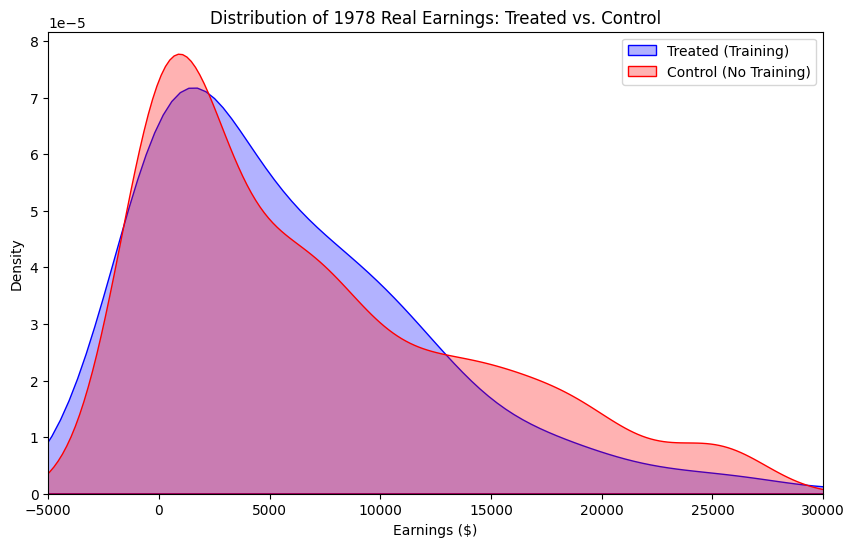

In [10]:
plt.figure(figsize=(10, 6))

# Plot KDE (Kernel Density Estimate) for both groups
sns.kdeplot(treated, fill=True, label='Treated (Training)', color='blue', alpha=0.3)
sns.kdeplot(control, fill=True, label='Control (No Training)', color='red', alpha=0.3)

plt.title('Distribution of 1978 Real Earnings: Treated vs. Control')
plt.xlabel('Earnings ($)')
plt.xlim(-5000, 30000) # Limit x-axis to focus on the core distribution
plt.legend()
plt.show()